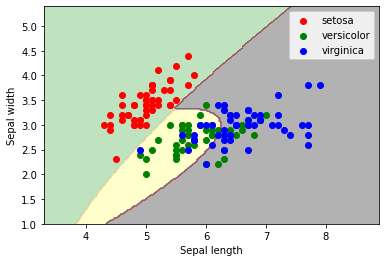

(array([0, 1, 2]), array([50, 43, 57]))


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X=iris.data[:, :2]
y = iris.target

#attempts to use a linear kernal for training. Can be changed
C=100
clf=svm.SVC(kernel='poly', gamma=10000, C=C, degree=2).fit(X,y)

#get min and max for first feature
x_min, x_max = X[:,0].min() -1, X[:,0].max() +1

#get min and max for second feature
y_min, y_max = X[:,1].min() -1, X[:,1].max() +1

#step size in the mesh set
h = (x_max/x_min)/100

#make predictions for each point in xx,yy
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

z=clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z=z.reshape(xx.shape)
plt.contourf(xx,yy,Z, cmap=plt.cm.Accent, alpha=0.5)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target) 
    #goes thorugh three times, plots points for a different species each time
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

predictions = clf.predict(X)
print(np.unique(predictions, return_counts=True))
#based on the results, it is seen that the two variables used can differentiate setosa pretty well, but not between 
#versicolor and virginica

#change the kernel type and C to see differences, remember to add gamma if necessary